The primary focus of this project is to show a numerical solution to the Lorenz equations, which is a set of differential equations that helped to evolve the study of deterministic chaos [3]. To help introduce 

**References:**

[1] Newman  
[2] Giordano  
[3] Muthuramalingam, Rasi. (2013). ANALYTICAL SOLUTION OF LORENZ EQUATION USING HOMOTOPY ANALYSIS METHOD. 
Journal of Global Research in Mathematical Archives. 1. 14. 
https://www.researchgate.net/publication/273641652_ANALYTICAL_SOLUTION_OF_LORENZ_EQUATION_USING_HOMOTOPY_ANALYSIS_METHOD  


In [2]:
import numpy as np
import RungeKutta as rk
import pylab as plt
from scipy.integrate import odeint
%matplotlib inline

In [3]:
def lorenzHAMApprox (r, t, r0, sigma, rho, beta, h):
    x, y, z = r
    x0, y0, z0 = r0
    
    fx = x0 - sigma * t (1 + h)
    fy = y0 - t * [1 + h (rho - 1)]
    fz = z0 - t * (beta + h)
    return np.array ([fx, fy, fz], float)

def lorenz (r, t, state):
    x, y, z = r
    sigma, rho, beta = state
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    
    return np.array ([fx, fy, fz], float)

def lorenz2 (t, r, state):
    x, y, z = r
    sigma, rho, beta = state
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    
    return np.array ([fx, fy, fz], float)


def lorenz3 (r, t):
    x, y, z = r
    sigma = 10
    rho = 28
    beta = 8 / 3
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    return np.array ([fx, fy, fz], float)  # derivatives



def solve_coupled(f,n,r0,interval,steps,*args,order=1):
    """ Solve system of coupled ODEs by Euler or Runge-Kutta methods,
    with fixed number of steps.

    f: vector function giving ODE as r'=f(t,r)
       Should return numpy array, so array arithmetic works.
       Note opposite argument order to Newman.
       We put independent variable first.
    n: number of spatial dimensions (i.e., dependent variables)
    r0: vector initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta) 
    
    Returns points (t,r1,...,rn), as (steps+1)x(n+1) numpy array.
    """

    # set up solution mesh
    # points will be indexed 0..steps
    (a,b) = interval  # endpoints
    h = (b-a)/steps  # step size
    points = np.zeros((steps+1,n+1))

    # set up initial point
    t = a    # current point t value
    r = r0   # current point r value
    points[0,0] = t
    points[0,1:] = r
    ## # alternatively:
    ## for i in range(n):
    ##     points[0,i+1] = r[i]

    for i in range(1,steps+1):

        # evaluate new point
        t_new = t + h
        if (order == 1):
            # Euler
            r_new = r + h * f(t,r,*args)
        elif (order == 2):
            # second-order Runge-Kutta
            # Newman (8.13)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            r_new = r + k2
        elif (order == 4):
            # fourth-order Runge-Kutta
            # Newman (8.17)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            k3 = h * f(t+1/2*h,r+1/2*k2,*args)
            k4 = h * f(t+h,r+k3,*args)
            r_new = r + 1/6*(k1+2*k2+2*k3+k4)

        # save new point
        (t,r) = (t_new,r_new)
        points[i,0] = t
        points[i,1:] = r

    return points

In [24]:
if __name__ == "__main__":
    sigma = 10
    rho = 28
    beta = 8 / 3
    state = (sigma, rho, beta)
    
    r0 = (1, 1, 1)
    
    interval = (0, 50)
    steps = 10
    order = 4
    numIndepVars = 3
    t = np.arange (interval[0], interval[1], interval[1] / steps)
    
    solution = rk.vectorRungeKutta (lorenz, numIndepVars, r0, interval, steps, state, order = 4)
    solution2 = solve_coupled (lorenz2, numIndepVars, r0, interval, steps, state, order = 4)
    solution3 = odeint (lorenz3, r0, t)
    
    print (solution)
    print (solution2)
    print (solution3)
    

    

[[  0.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  5.00000000e+00  -1.00902733e+07  -5.01042648e+10   9.22488626e+10]
 [  1.00000000e+01   1.76606908e+52  -1.89792639e+83   3.49434583e+83]
 [  1.50000000e+01              inf              nan              nan]
 [  2.00000000e+01              nan              nan              nan]
 [  2.50000000e+01              nan              nan              nan]
 [  3.00000000e+01              nan              nan              nan]
 [  3.50000000e+01              nan              nan              nan]
 [  4.00000000e+01              nan              nan              nan]
 [  4.50000000e+01              nan              nan              nan]
 [  5.00000000e+01              nan              nan              nan]]
[[  0.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  5.00000000e+00  -1.00902733e+07  -5.01042648e+10   9.22488626e+10]
 [  1.00000000e+01   1.76606908e+52  -1.89792639e+83   3.49434583e+83]
 [  1

C:\Users\Unknown\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Unknown\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
C:\Users\Unknown\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Unknown\Documents\GitHub\Dannie\Computational\Final_Project\RungeKutta.py:64: RuntimeWarning: invalid value encountered in add
  r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
C:\Users\Unknown\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Unknown\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Unknown\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWa

In [9]:
def nonlinearOscillator (r, t, g, l, F_f, F_d, omega_d):
    omega, theta = r
    
    fomega = -g /l * np.sin (theta) - F_f * omega + F_d * np.sin (omega_d * t)
    ftheta = omega
    
    return np.array ([fomega, ftheta], float)

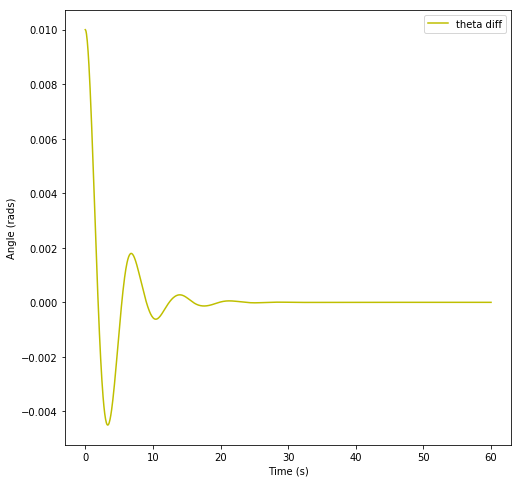

In [51]:
if "__main__" == __name__:
    r0 = (0, 0.2) #omega, theta
    
    interval = (0, 60)
    steps = 1000
    order = 4
    numIndepVars = 2
    
    g = 9.8
    l = 9.8
    F_f = 0.5
    F_d = 0.5
    omega_d = 2/3
    
    solution = rk.vectorRungeKutta (nonlinearOscillator, numIndepVars, r0, interval, steps, g, l, F_f, F_d, omega_d, order = 4)
    r0 = (0, 0.21)
    solution2 = rk.vectorRungeKutta (nonlinearOscillator, numIndepVars, r0, interval, steps, g, l, F_f, F_d, omega_d, order = 4)
    
    diff = solution2[:,2] - solution[:,2]
    
    #set up plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Angle (rads)")

    #plt.plot(solution[:,0],solution2[:,2], "--k", label = "theta2")
    #plt.plot(solution[:,0],solution[:,2], "-y", label = "theta")
    plt.plot(solution[:,0], diff, "-y", label = "theta diff")
    
    plt.legend()
    plt.show ()